In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X ** 3 + 0.1 * np.random.randn(*X.shape)

In [4]:
# Neural Network with one hidden layer
class NeuralNetworkAdam:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

        # Adam optimizer params
        self.m_w1, self.v_w1 = 0, 0
        self.m_b1, self.v_b1 = 0, 0
        self.m_w2, self.v_w2 = 0, 0
        self.m_b2, self.v_b2 = 0, 0
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.eps = 1e-8
        self.t = 0

    def relu(self, z):
        return np.maximum(0, z)

    def relu_deriv(self, z):
        return z > 0

    def forward(self, X):
        self.z1 = X.dot(self.w1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1.dot(self.w2) + self.b2
        return self.z2

    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def backward(self, X, y, y_pred):
        m = X.shape[0]
        dz2 = (2/m) * (y_pred - y)
        dw2 = self.a1.T.dot(dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        da1 = dz2.dot(self.w2.T)
        dz1 = da1 * self.relu_deriv(self.z1)
        dw1 = X.T.dot(dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        return dw1, db1, dw2, db2

    def update_with_adam(self, dw1, db1, dw2, db2):
        self.t += 1

        # Update weights 1
        self.m_w1 = self.beta1 * self.m_w1 + (1 - self.beta1) * dw1
        self.v_w1 = self.beta2 * self.v_w1 + (1 - self.beta2) * (dw1 ** 2)
        m_w1_hat = self.m_w1 / (1 - self.beta1 ** self.t)
        v_w1_hat = self.v_w1 / (1 - self.beta2 ** self.t)
        self.w1 -= self.lr * m_w1_hat / (np.sqrt(v_w1_hat) + self.eps)

        # Update bias 1
        self.m_b1 = self.beta1 * self.m_b1 + (1 - self.beta1) * db1
        self.v_b1 = self.beta2 * self.v_b1 + (1 - self.beta2) * (db1 ** 2)
        m_b1_hat = self.m_b1 / (1 - self.beta1 ** self.t)
        v_b1_hat = self.v_b1 / (1 - self.beta2 ** self.t)
        self.b1 -= self.lr * m_b1_hat / (np.sqrt(v_b1_hat) + self.eps)

        # Update weights 2
        self.m_w2 = self.beta1 * self.m_w2 + (1 - self.beta1) * dw2
        self.v_w2 = self.beta2 * self.v_w2 + (1 - self.beta2) * (dw2 ** 2)
        m_w2_hat = self.m_w2 / (1 - self.beta1 ** self.t)
        v_w2_hat = self.v_w2 / (1 - self.beta2 ** self.t)
        self.w2 -= self.lr * m_w2_hat / (np.sqrt(v_w2_hat) + self.eps)

        # Update bias 2
        self.m_b2 = self.beta1 * self.m_b2 + (1 - self.beta1) * db2
        self.v_b2 = self.beta2 * self.v_b2 + (1 - self.beta2) * (db2 ** 2)
        m_b2_hat = self.m_b2 / (1 - self.beta1 ** self.t)
        v_b2_hat = self.v_b2 / (1 - self.beta2 ** self.t)
        self.b2 -= self.lr * m_b2_hat / (np.sqrt(v_b2_hat) + self.eps)

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            dw1, db1, dw2, db2 = self.backward(X, y, y_pred)
            self.update_with_adam(dw1, db1, dw2, db2)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.5f}")

In [5]:
# Training the model
nn = NeuralNetworkAdam(input_size=1, hidden_size=10, output_size=1, learning_rate=0.01)
nn.train(X, y, epochs=1000)

Epoch 0: Loss = 0.06323
Epoch 100: Loss = 0.01026
Epoch 200: Loss = 0.00764
Epoch 300: Loss = 0.00753
Epoch 400: Loss = 0.00750
Epoch 500: Loss = 0.00748
Epoch 600: Loss = 0.00747
Epoch 700: Loss = 0.00746
Epoch 800: Loss = 0.00746
Epoch 900: Loss = 0.00745


In [6]:
y_pred = nn.forward(X)
y_pred

array([[-0.87271654],
       [-0.84080569],
       [-0.80889484],
       [-0.77698399],
       [-0.74507314],
       [-0.71316229],
       [-0.68125144],
       [-0.64934059],
       [-0.61742974],
       [-0.58551889],
       [-0.55360804],
       [-0.52169719],
       [-0.48978634],
       [-0.45787549],
       [-0.42596464],
       [-0.39405379],
       [-0.36214294],
       [-0.3302321 ],
       [-0.29832125],
       [-0.2664104 ],
       [-0.23490885],
       [-0.21832449],
       [-0.20174012],
       [-0.18515575],
       [-0.16857139],
       [-0.15198702],
       [-0.13540265],
       [-0.11881828],
       [-0.10223392],
       [-0.08564955],
       [-0.06906518],
       [-0.05405556],
       [-0.05318657],
       [-0.05231757],
       [-0.05144858],
       [-0.05057959],
       [-0.04971059],
       [-0.0488416 ],
       [-0.0479726 ],
       [-0.04710361],
       [-0.04623461],
       [-0.04536562],
       [-0.04449662],
       [-0.04362763],
       [-0.04275863],
       [-0

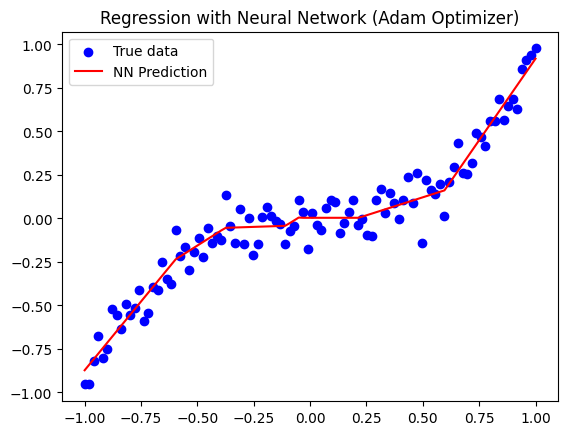

In [7]:
plt.scatter(X, y, color='blue', label="True data")
plt.plot(X, y_pred, color='red', label="NN Prediction")
plt.legend()
plt.title("Regression with Neural Network (Adam Optimizer)")
plt.show()